# **Week 10 - Inference for Proportions**

In [2]:
# Import all needed python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.proportion as smprop
import math

## **Exercise 7.1 Passing proportions**

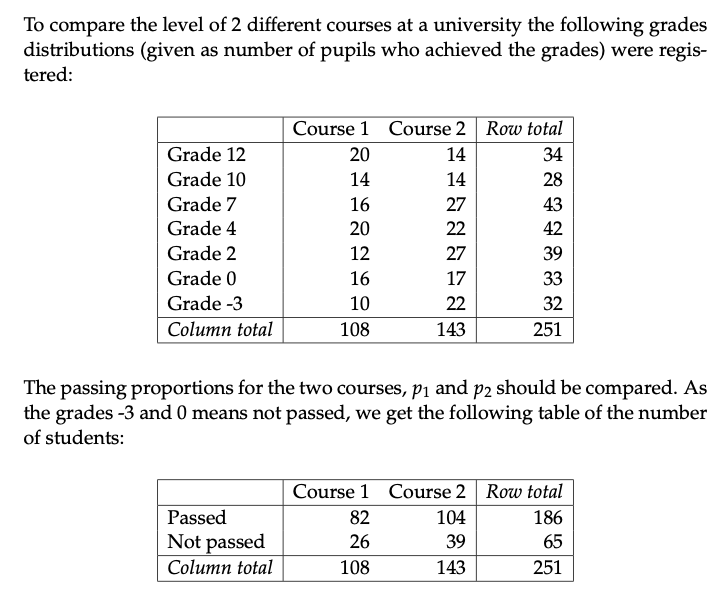

### **a) Compute a 95% confidence interval for the difference between the two passing proportions.**

We use method 7.15:

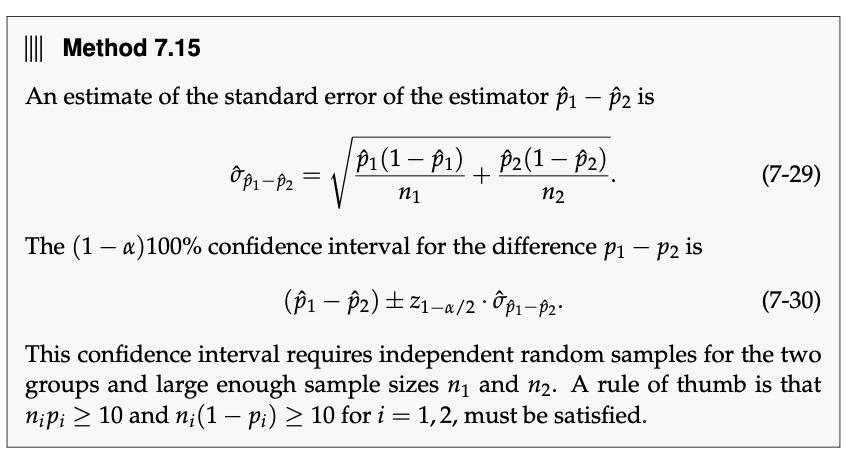

In [3]:
# Given data
x1, n1 = 82, 108
x2, n2 = 104, 143

# Calculate proportions
p1 = x1 / n1
p2 = x2 / n2

# Standard deviation of the difference
sigma_diff = np.sqrt((p1 * (1 - p1)) / n1 + (p2 * (1 - p2)) / n2)

# Confidence interval for the difference in proportions
z_score = stats.norm.ppf(1 - 0.05 / 2)
conf_interval = (p1 - p2) + np.array([-1, 1]) * z_score * sigma_diff
print("Confidence Interval:", conf_interval)

Confidence Interval: [-0.0767781   0.14075117]


### **b) What is the critical values for the $\chi^2$-test of the hypothesis $H0 : p_1 = p_2$ with significance level $α = 0.01$?**

We have two hypotheses (c=2), so the df must be: $df=c-1=2-1=1$:

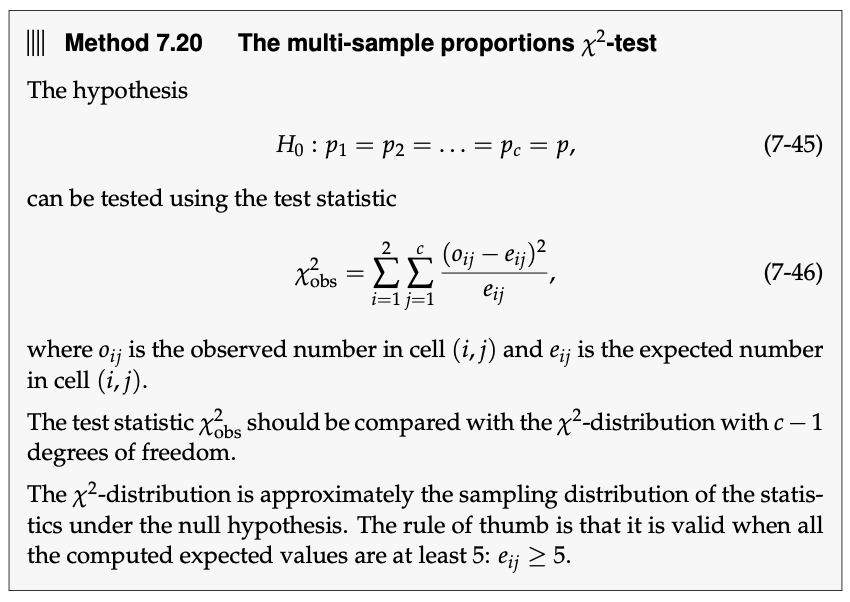

In [4]:
# Significance level
alpha = 0.01

# Degrees of freedom
df = 2-1

# Critical value for the chi-squared test
critical_value = stats.chi2.ppf(1 - alpha, df)
print("Critical value for χ²-test at α = 0.01 with df = 1:", critical_value)

Critical value for χ²-test at α = 0.01 with df = 1: 6.6348966010212145


### **c) Non-passing students**

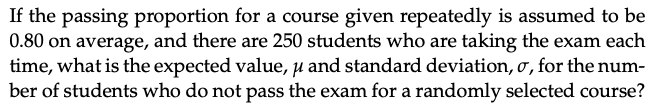

The problem is binomial-distributed.

In [5]:
# Given data
p_pass = 0.80
p_fail = 1 - p_pass
n = 250

# Expected value (mean) and standard deviation
mu = n * p_fail
sigma = np.sqrt(n * p_fail * (1 - p_fail))

print("Expected number of students who do not pass (μ):", mu)
print("Standard deviation (σ):", sigma)

Expected number of students who do not pass (μ): 49.999999999999986
Standard deviation (σ): 6.324555320336758


## **Exercise 7.2 Outdoor lighting**

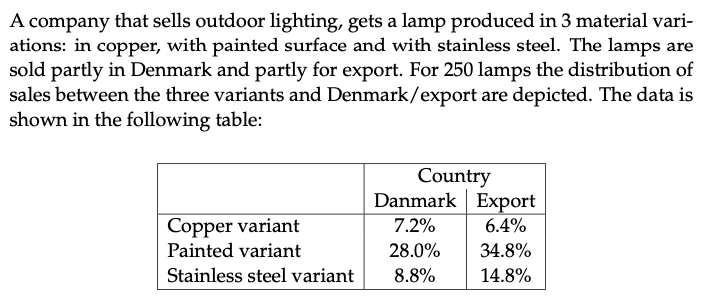

### **a) Is there a significant difference between the proportion exported and the proportion sold in Denmark (with α = 0.05)?**

This is a "one-sample proportion" case (Yes/No), similar to example 7.2 with gasoline. We use Method 7.11 to calculate the observed 
z-value with $p_0=0.5$:

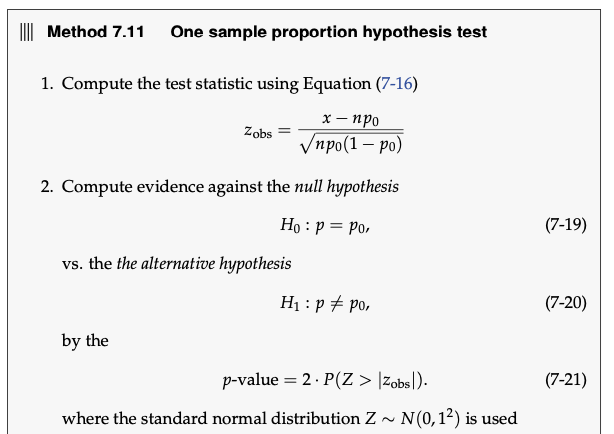

In [34]:
# Proportion of sales in Denmark
p = (7.2 + 28 + 8.8)/100
n = 250
dk_sales = 250 * p
print("Number of sales in Denmark:", dk_sales)

export_sales = n - dk_sales
print("Number of sales for export:", export_sales)


# Expected proportion and standard error
p0 = 0.5
z_obs = (dk_sales - n * p0) / np.sqrt(n * p0 * (1 - p0))

# Calculate p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_obs)))
print("\nObserved z-value (z_obs):", z_obs)
print("p-value:", p_value)

# Interpretation
if p_value > 0.05:
    print("\nNo significant difference (p > 0.05).")
else:
    print("\nSignificant difference (p <= 0.05).")

Number of sales in Denmark: 110.0
Number of sales for export: 140.0

Observed z-value (z_obs): -1.8973665961010275
p-value: 0.05777957112359733

No significant difference (p > 0.05).


### **b) The relevant critical value to use for testing whether there is a significant difference in how the sold variants are distributed in Denmark and for export is (with α = 0.05)?**

In [7]:
# we look at method 7.22 and see we have:
r = 3 #rows
c = 2 #columns
df = (r-1)*(c-1)
print("Degrees of freedom:", df)

print("The relevant critical value is:", stats.chi2.ppf(1-0.05, df))

Degrees of freedom: 2
The relevant critical value is: 5.991464547107979


In [36]:
chi2_obs, p_val, (obs,exp) = smprop.proportions_chisquare([110,140],[250,250])
print("Chi2 observed:", chi2_obs)
print("p-value:", p_val)


Chi2 observed: 7.2
p-value: 0.0072903580915356595


## **Exercise 7.3 Local elections**

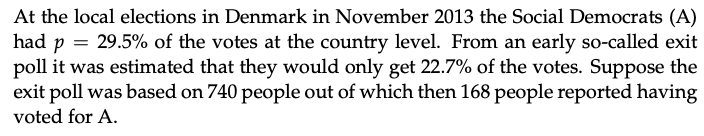

### **a) Testing $H_0$**

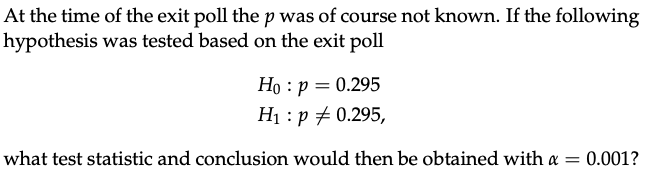

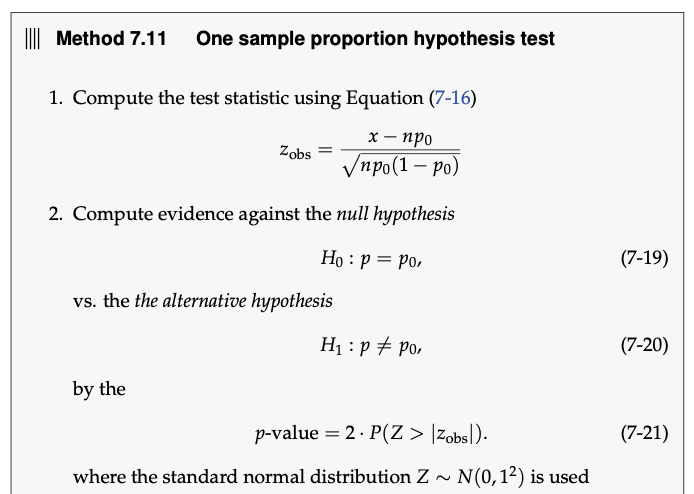

In [8]:
# Given data
n = 740
x = 168

p0 = 0.295

# Calculate observed z-value (z_obs)
z_obs = (x - n * p0) / np.sqrt(n * p0 * (1 - p0))
print("Observed z-value (z_obs):", z_obs)

# z critical interval for alpha = 0.001
z_critical = stats.norm.ppf(1 - 0.001 / 2)
z_interval = (-z_critical, z_critical)
print("z critical interval:", z_interval)

# Decision
if abs(z_obs) > z_critical:
    print("\nReject H0: The observed z-value is outside the critical interval.")
else:
    print("\nDo not reject H0: The observed z-value is within the critical interval.")


Observed z-value (z_obs): -4.054586394247811
z critical interval: (-3.2905267314919255, 3.2905267314919255)

Reject H0: The observed z-value is outside the critical interval.


### **b) Calculate a 95%-confidence interval for p based on the exit poll.**

In [9]:
phat = x/n

phat + np.array([-1,1]) *  stats.norm.ppf(1-0.05/2) * np.sqrt((phat * (1-phat))/n)

array([0.19684467, 0.25720939])

### **c) Based on a scenario that the proportion voting for particular party is around 30%, how large an exit poll should be taken to achieve a 99% confidence interval having a width of 0.01 in average for this proportion?**


We use method 7.13 to determine the size n of the exit poll. We know the width of the CI (which is 0.01), which means the margin of error is 0.01/2.

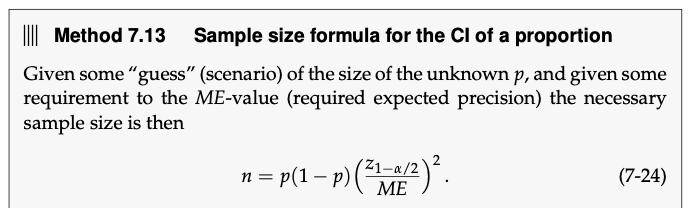

In [10]:

p = 0.3  # Estimated proportion
z = stats.norm.ppf(1 - 0.01 / 2)  # z-value for 99% confidence level
ME = 0.01 / 2  # Margin of error is half the width of the confidence interval

# Calculate sample size (n) using Method 7.13
n = math.ceil(p * (1 - p) * (z / ME) ** 2)
print("Required sample size (n):", n)

Required sample size (n): 55734


## **Exercise 7.4 Sugar quality**

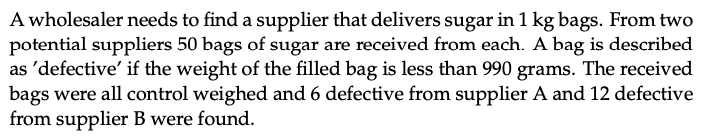

### **a) Testing $H_0$**

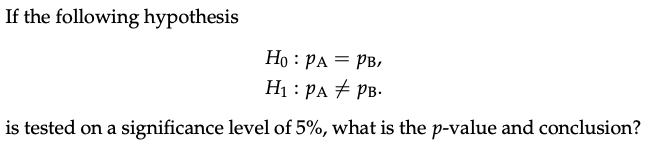

We use method 7.18 to do a two sample hypothesis test:

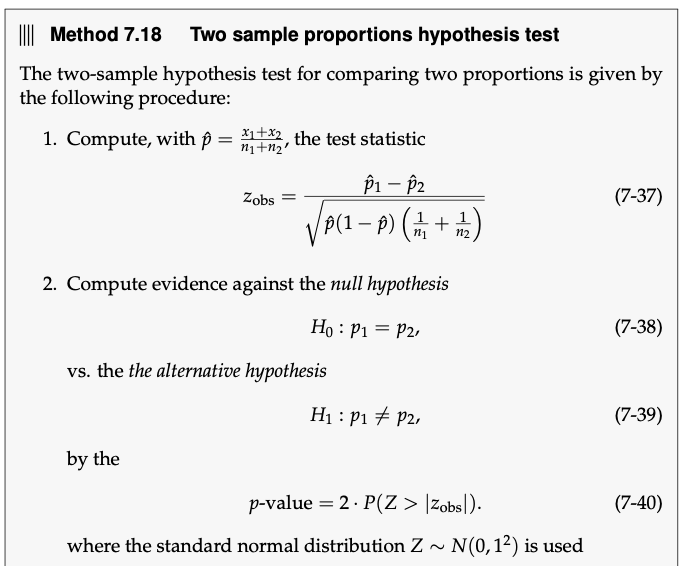

In [11]:

pA = 6/50
pB = 12/50

phat = (6+12)/(50+50)

zobs = (pA-pB)/np.sqrt((phat * (1-phat) * (2/50)))

p_value = 2 * (1 - stats.norm.cdf(abs(zobs)))
print("p-value:", p_value)

p-value: 0.11834981273562839


So there is not a difference between A and B.

### **b) A supplier has delivered 200 bags, of which 36 were defective. A 99% confidence interval for p the proportion of defective bags for this supplier is:**

In [12]:
#one sample CI

x = 36
n = 200

phat = x/n

phat + np.array([-1,1]) * stats.norm.ppf(1-0.01/2) * np.sqrt(phat * (1-phat)/n)

array([0.11002462, 0.24997538])

### **c) Finding the width**

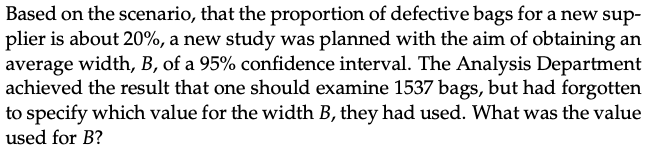

We isolate ME in 7.13:

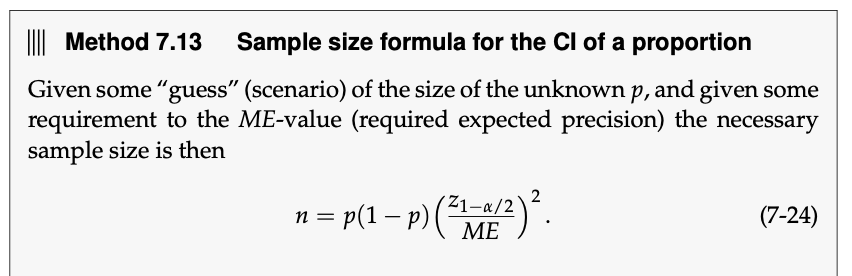

and then multiply with 2 to get the width B.

In [13]:
# Given values
n = 1537  # Sample size
p = 0.20  # Proportion
z = stats.norm.ppf(1 - 0.05 / 2)  # z-value for 95% confidence level

# Calculate Margin of Error (ME)
ME = np.sqrt(p * (1 - p) * (z ** 2) / n)
print(f"Margin of Error (ME):{ME:.3f}" )

# Calculate the width 
width = 2 * ME
print(f"Width of the confidence interval: {width:.3f}" )

Margin of Error (ME):0.020
Width of the confidence interval: 0.040


## **Exercise 7.5 Physical training**

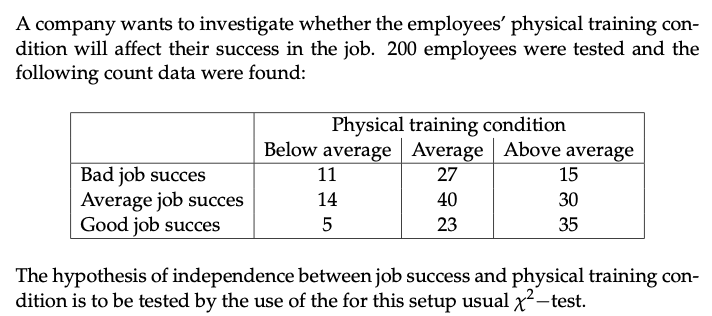

### **a) What is the expected number of individuals with above average training condition and good job success under H0 (i.e. if H0 is assumed to be true)?**

We use eq. 7-53 to deterine the expected number:

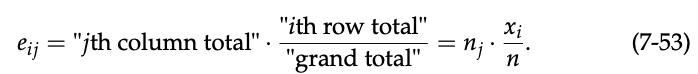

In [14]:
#e33 = 3'th column total * 3th row total/grand total
e33 = (15+30+35) * (5+23+35)/200

print("The expected number of individuals with above average training condition and good job sucess is:", e33)

The expected number of individuals with above average training condition and good job sucess is: 25.2


### **b) Finding relevant numbers:**

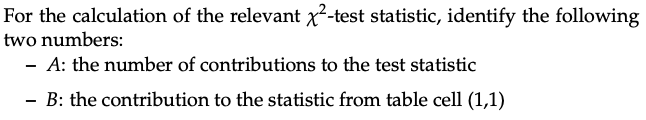

A is the number of cells, so: $3*3=9$

B is contribution of celle (1,1) given by: (method 7.22)
$$\frac{(o_{11} - e_{11})^2}{e_{11}}$$

In [15]:
#so we have:
e11 = (11+14+5) * (11+27+15)/200 #using 7-53
o11 = 11
B = (o11-e11)**2/e11 
print("The contribution is:", B)

The contribution is: 1.1701257861635217


### **c) The total $\chi^2$-test statistic is 10.985, so the p-value and the conclusion will be (both must be valid):**

From method 7.22 we know we can reject $H_0$ if 
$$
\chi_{\mathrm{obs}}^2>\chi_{1-\alpha}^2((r-1)(c-1))
$$

In [16]:
#the quantile is:

stats.chi2.ppf(1-0.05, df=(3-1)*(3-1))

9.487729036781154

So we can reject $H_0$.

Otherwise we could calculate the p-value: (note we do not multiply with 2 since the test is one-sided).

In [17]:
1 - stats.chi2.cdf(10.985, df=(3-1)*(3-1))

0.0267331119109403